# PREPARE THE DATA

In [129]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

study_results = "Z:/Private/drodriguez/Info/Info General DRDLVS/TEC Analytics Bootcamp/Module 5 Challenge/Pymaceuticals/data/Study_results.csv"
mouse_metadata = "Z:/Private/drodriguez/Info/Info General DRDLVS/TEC Analytics Bootcamp/Module 5 Challenge/Pymaceuticals/data/Mouse_metadata.csv"

In [130]:
os.getcwd()

'Z:\\Private\\drodriguez\\Info\\Info General DRDLVS\\TEC Analytics Bootcamp\\Module 5 Challenge\\Pymaceuticals\\data'

In [131]:
study_results = pd.read_csv(study_results)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [132]:
mouse_metadata = pd.read_csv(mouse_metadata)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [133]:
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
unique_mice = combined_df["Mouse ID"].nunique()
unique_mice

249

In [7]:
ID_mice_duplicates = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
ID_mice_duplicates

array(['g989'], dtype=object)

In [10]:
dup_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
new_clean_df = combined_df[combined_df['Mouse ID'].isin(ID_mice_duplicates)==False]
new_clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [17]:
new_unique_mice = combined_df["Mouse ID"].nunique()
new_unique_mice

249

# GENERATE SUMMARY STATISTICS

In [21]:
mean = new_clean_df['Tumor Volume (mm3)'].groupby(new_clean_df['Drug Regimen']).mean()
median = new_clean_df['Tumor Volume (mm3)'].groupby(new_clean_df['Drug Regimen']).median()
var = new_clean_df['Tumor Volume (mm3)'].groupby(new_clean_df['Drug Regimen']).var()
std = new_clean_df['Tumor Volume (mm3)'].groupby(new_clean_df['Drug Regimen']).std()
sem = new_clean_df['Tumor Volume (mm3)'].groupby(new_clean_df['Drug Regimen']).sem()

summary_statistics = pd.DataFrame({"Tumor Volume(Mean)":mean, 
                                   "Tumor Volume(Median)":median, 
                                   "Tumor Volume (Variance)":var, 
                                   "Tumor Volume (Standard Deviation)":std, 
                                   "Tumor Volume (SEM)":sem})

summary_statistics

,Tumor Volume(Mean),Tumor Volume(Median),Tumor Volume (Variance),Tumor Volume (Standard Deviation),Tumor Volume (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# CREATE BAR CHARTS AND PIE CHARTS

##### Bar chart with pandas

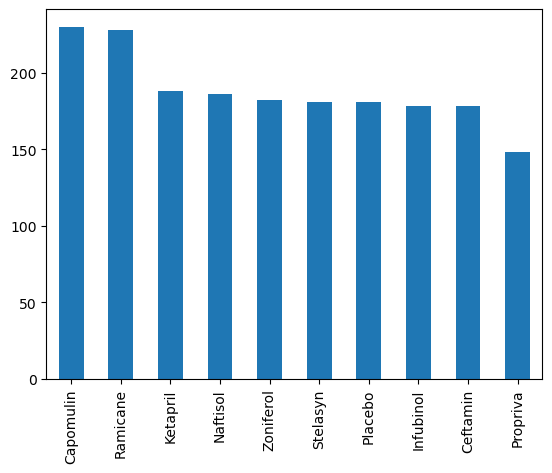

In [25]:
mice_count = clean_df["Drug Regimen"].value_counts()
plot_pandas = mice_count.plot.bar()  

###### Bar chart with matplotlib

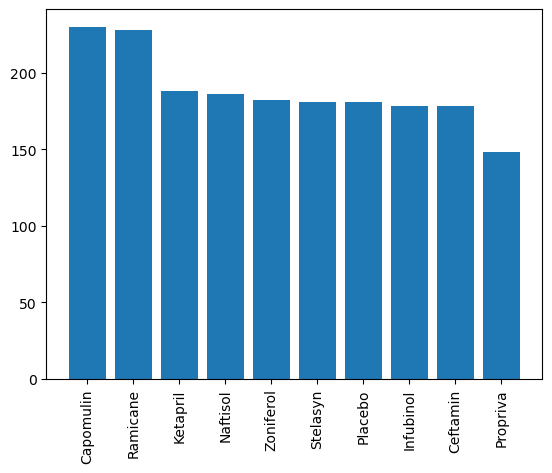

In [31]:
x_axis = mice_count.index.values
y_axis = mice_count.values


plt.bar(x_axis, y_axis)
plt.xticks(rotation="vertical")
plt.show()

###### Pie chart with pandas

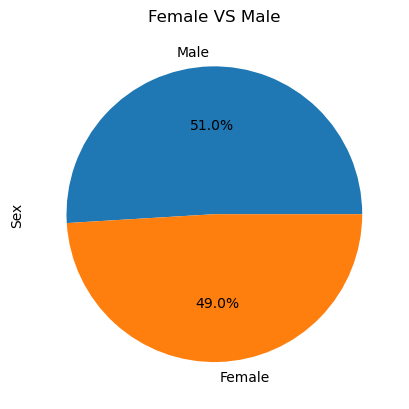

In [37]:
mice_gender = clean_df["Sex"].value_counts()
plt.title("Female VS Male")
mice_gender.plot.pie(autopct= "%1.1f%%")
plt.show()

###### Pie chart with matplotlib

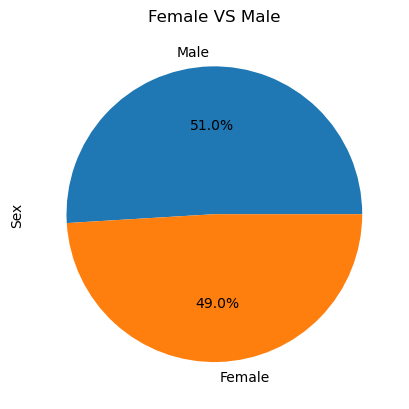

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = mice_gender.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Female VS Male')
plt.ylabel('Sex')
plt.show()

# Calculate Quartiles, Find Outliers, and Create a Box Plot

In [63]:
tumor_max = new_clean_df.groupby('Mouse ID')['Timepoint'].max()
tumor_max = tumor_max.reset_index()
merge = tumor_max.merge(new_clean_df, on = ['Mouse ID','Timepoint'], how = 'left' )
merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [70]:
treatments = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
vol_list = []

for treatment in treatments:
    tumor_vol = merge.loc[merge['Drug Regimen']== treatment,'Tumor Volume (mm3)']
    vol_list.append(tumor_vol)

    quartiles =tumor_vol.quantile([.25,.5,.75])
    lowerquartile = quartiles[0.25]
    upperquartile = quartiles[0.75]
    iqr = upperquartile-lowerquartile


#     print(f"The lower quartile of {treatment} is: {lowerquartile}")
#     print(f"The upper quartile of {treatment} is: {upperquartile}")
#     print(f"The interquartile range of {treatment} is: {iqr}")
#     print(f"The median of {treatment} is: {quartiles[0.5]} ")

    lower_bound = lowerquartile - (1.5*iqr)
    upper_bound = upperquartile + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol<lower_bound)|(tumor_vol>upper_bound)]
    print(f"{treatment} {outliers} are outliers.")
   




Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64) are outliers.
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64) are outliers.
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64 are outliers.
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64) are outliers.


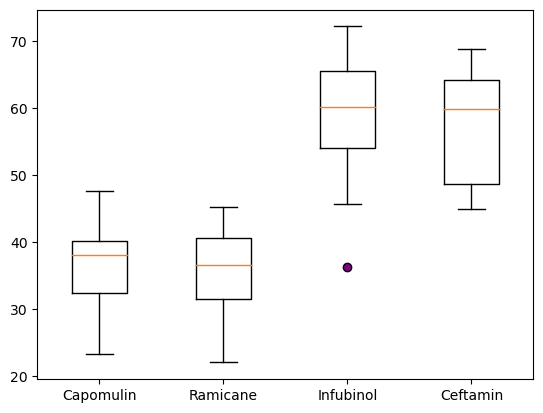

In [74]:
marker = dict(markerfacecolor='purple' )
plt.boxplot(vol_list, labels=treatments, flierprops=marker)
plt.show()

In [81]:
Capomulin_df = new_clean_df.loc[new_clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = new_clean_df.loc[new_clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = new_clean_df.loc[new_clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = new_clean_df.loc[new_clean_df["Drug Regimen"] == "Ceftamin", :]

# Create a Line Plot and a Scatter Plot

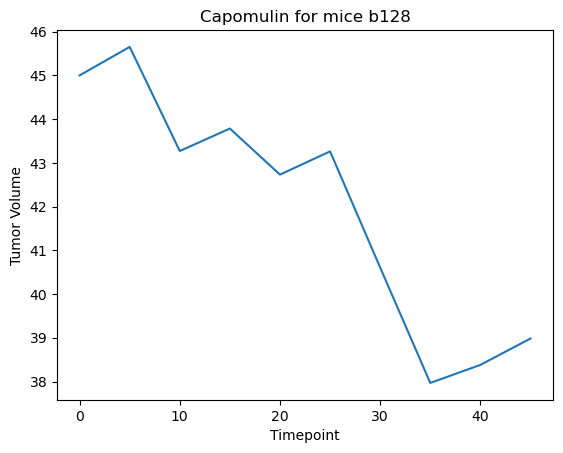

In [84]:
# Select a single mouse that was treated with Capomulin, and generate a line plot of tumor volume versus 
# time point for that mouse.
Capomulin_df = new_clean_df.loc[new_clean_df["Drug Regimen"] == "Capomulin",:]
results = Capomulin_df.loc[Capomulin_df['Mouse ID']=='b128']
plt.plot(results['Timepoint'], results['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title('Capomulin for mice b128')
plt.show()

C:\Users\drodriguez\AppData\Local\Temp\ipykernel_29844\4248865876.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_avg_volume =Capomulin_df.groupby(['Mouse ID']).mean()


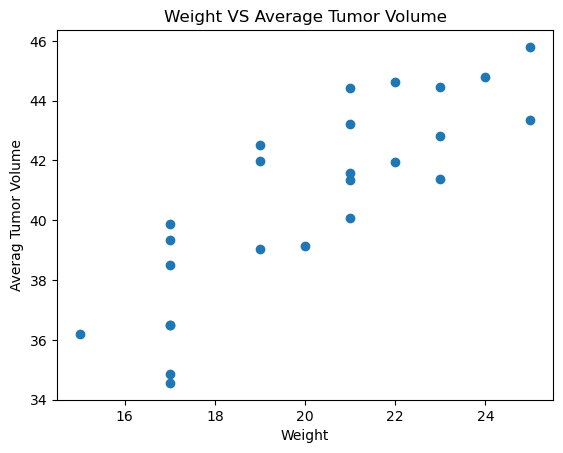

In [94]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg_volume =Capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_avg_volume['Weight (g)'],capomulin_avg_volume['Tumor Volume (mm3)'])
plt.xlabel('Weight')
plt.ylabel('Averag Tumor Volume')
plt.title('Weight VS Average Tumor Volume')
plt.show()